# COGS 108 - Final Project 

# Overview

My project is trying to show what did people like and don't like about parks in San Diego, based on the Yelp reviews. Using various text analysis techniques we learned this quarter, including sentiment analysis and TF-IDF, I found some patterns about what people love about parks in San Diego. However, due to various kinds of limitations, the pattern about what people don't love is not clear.

# Name & GitHub

- Name: Jared Zhang
- PID: A15889667
- GitHub Username: SOLar23333

# Research Question

Based on the Yelp review, what did people like about parks in San Diego, and what are things that people don't like?

## Background and Prior Work

I love the ocean, but I grew up in an inland city. Ever since I moved to San Diego, I was amazed by the natural beauty of this place. Year-round sunshine, good weather, and the pacific ocean mean plenty of green spaces, good air quality, and a gorgeous ocean view. Not to mention different kinds of playgrounds and trails around the city. I might be biased, but for me, every park in San Diego is perfect. 

Of course, this is not true for all people. According to the Yelp review, we did have some low-rating parks in San Diego, and people complained about these parks' specific features. In this project, I will use different techniques that we have learned during this quarter to perform text analysis of some Yelp reviews about various San Diego parks. I will try to find out that generally speaking, what are some great features that people love about and hate about. 

There are plenty of articles about "San Diego's park recommendation" or "Best parks in San Diego." By reading these articles, some of the keywords that frequently appear in the recommendation reasons are the ocean, beachside, coastline, large, beautiful views, trails, hikes, kids, playground, grass.

Reference similar to "Worst parks in San Diego" is hard to find; thus, the result may rely on our analysis.

References (include links):
- 1) https://www.10best.com/destinations/california/san-diego/attractions/parks/
- 2) https://fitt.co/san-diego/articles/the-most-beautiful-parks-and-green-spaces-in-san-diego

# Hypothesis


H0: The Yelp reviews did not show a significant pattern about what people love and hate about San Diego parks.

HA: The Yelp reviews did show a significant pattern about what people love and hate about San Diego parks.

# Dataset(s)


- Dataset Name: San Diego Parks Yelp Data - Reviews
- Link to the dataset:https://www.yelp.com/ and https://www.yelp.com/developers/documentation/v3/business_reviews
- Number of observations: 2333

This data set contains the user's reviews about various parks in San Diego. Each observation includes an id (name of the park), the star rating, and the comments.

# Setup

In [1]:
# pandas and matplotlib setup
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 14})
import seaborn as sns

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

import warnings
warnings.filterwarnings('ignore')

#import natural language toolkit
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# download stopwords & punkt
nltk.download('vader_lexicon') 
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/solar23333/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/solar23333/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/solar23333/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data Cleaning

### Read in the dataset and take a look

In [2]:
df = pd.read_csv("yelp_SD_reviews.csv")
df.head()

,id,rating,text
0,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Balboa Park,5,Beautiful grounds even to take a stroll during...
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is..."


### Shape and missingness

In [3]:
df.shape

(2333, 3)

In [4]:
df["id"].unique().size

818

In [5]:
df.isnull().sum()

id        0
rating    0
text      0
dtype: int64

The dataset contains 3 columns and 2333 rows, with no missing data. In addition, it contains reviews about 818 unique parks in San Diego.

### Exploratory Plots

First, we want to take a look at the summary polt of rating, to see how many reviews should be tagged as "positive" review and how many should be "negative".

Text(0.5, 1.0, 'Rating Summary')

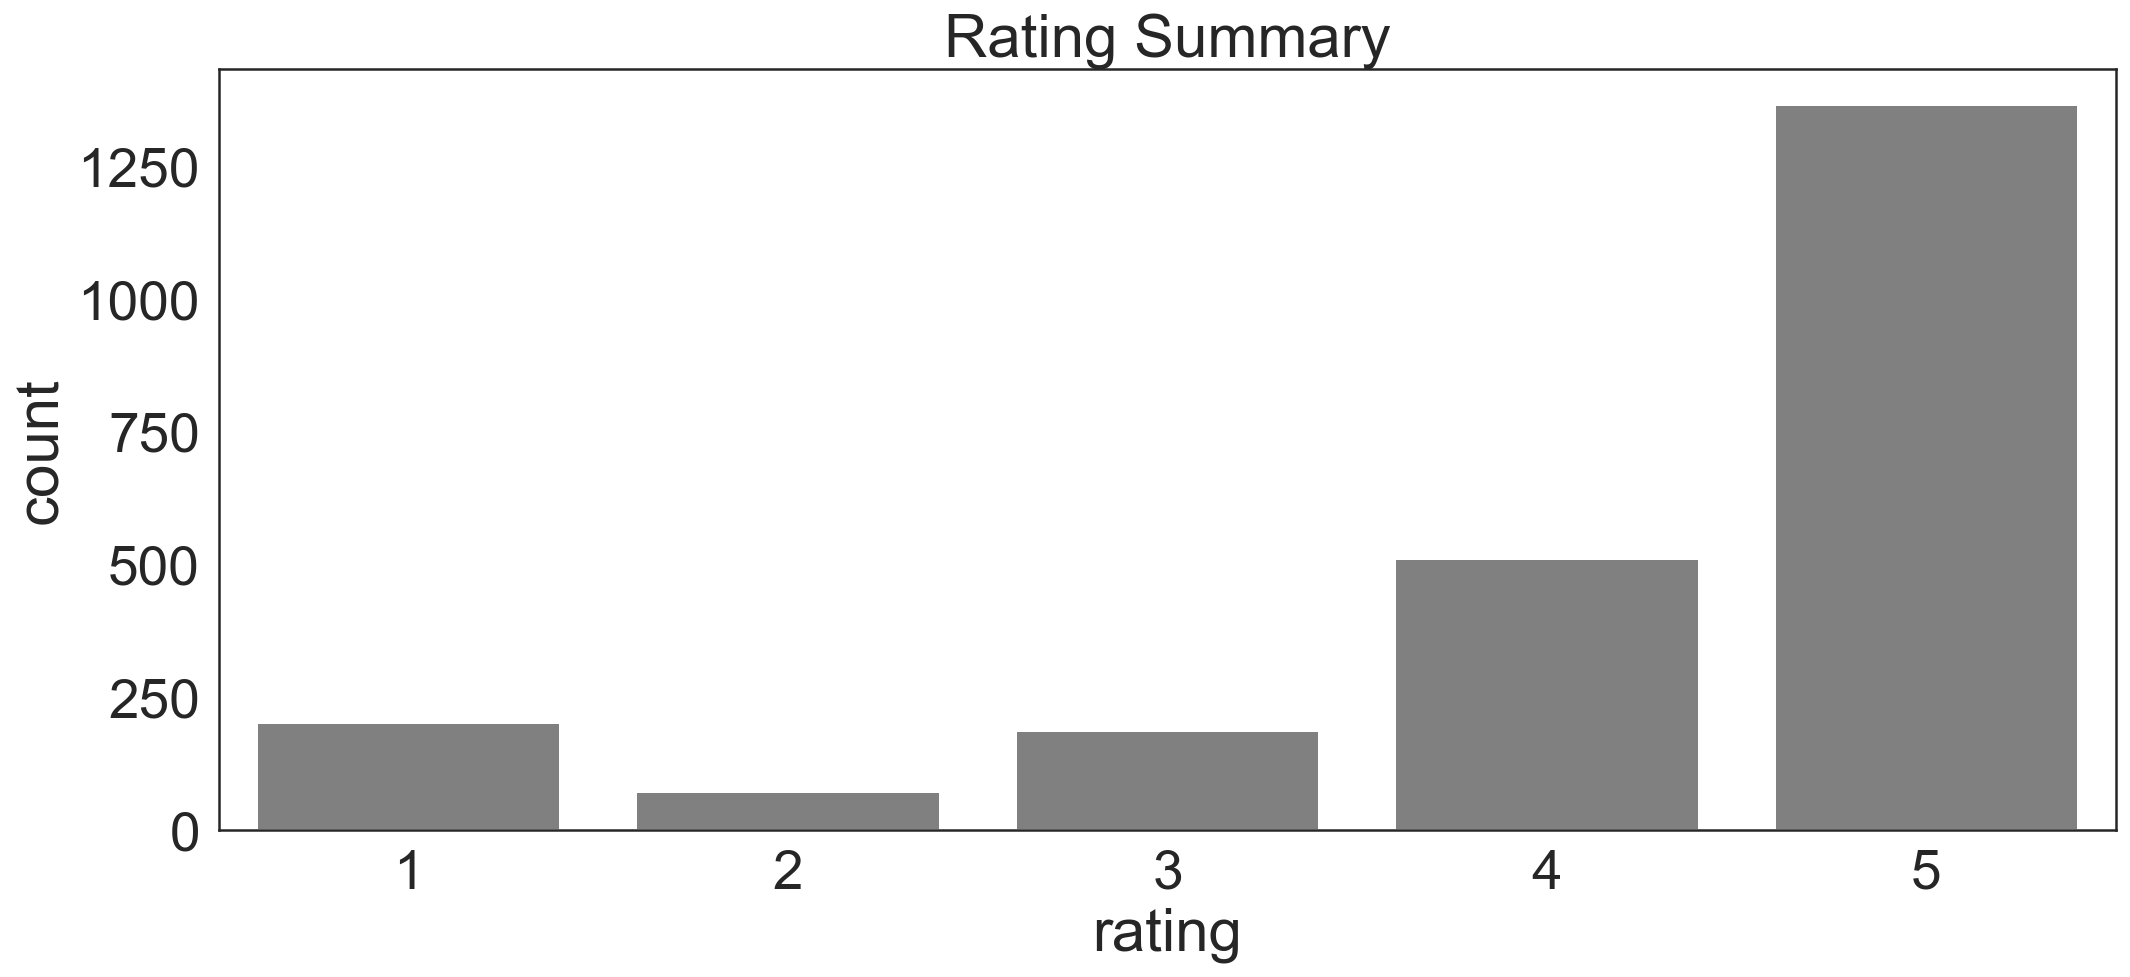

In [6]:
sns.set(font_scale = 2.5)
sns.set_style(style = "white")
sns.countplot(df["rating"], color = "gray").set_title("Rating Summary")

We see that majority of the reviews are 4 stars and 5 stars. At this point, I'm not sure whether I should tag 3 stars rating as positive or negative. Therefore, let's take a look at some 3 stars rating.

In [7]:
df[df["rating"] == 3].text.head(10)

16     Cute little community park. I've been here a c...
30     Well finally got to give this park a Review an...
46     Definitely a nice older neighborhood park. The...
70     I came to this park because we were in the are...
75     Came to this park cause my daughter likes to p...
77     The park is quiet and usually not crowded at a...
89     It is always nice to get outside and enjoy the...
104    Heritage Park is a must see !  It's next to th...
127    Clean, shady community park with lots of trees...
133    I've only come here when there's an event goin...
Name: text, dtype: object

Take a look at these reviews, I found that most of them are actually positive reviews. Therefore, I will classify rating that are 3-5 stars as positive reviews, and 1-2 stars as negative reviews.

Split the dataset into two part.

In [8]:
df_pos = df[df["rating"] >= 3]
df_neg = df[df["rating"] <= 2]
df_neg.head(10)

,id,rating,text
5,Civita Park,1,We love Civita Park for its wide open spaces t...
241,Cowles Mountain,1,Stay away!! \n\nGo take your graffiti and lou...
287,Edward Tyler Cramer Park,1,There is NO PARKING. This is a taxpayer mainta...
292,Bay Park,2,Bay Park has been a disappointment on the last...
318,Western Hills Park,2,I almost got a ticket there for having my dog ...
319,South Clairemont Recreation Center & Community...,1,Stay away from the youth theater program if yo...
327,Ray's Tennis Shop,1,"I've tried, for the better part of 3, years to..."
333,Cadman Park Leash-Free Area,1,This park brought awareness to the danger of o...
338,Nate's Point Dog Park - Balboa Park,2,Dog park review #4 - I would say 2.5 but Yelp ...
349,Emerald City Realty,1,We bought a home through Emerald. It was one o...


### Tokenization

In [9]:
df_pos["origin_text"] = df_pos["text"]
df_neg["origin_text"] = df_neg["text"]

df_pos["text"] = df_pos["text"].apply(word_tokenize)
df_neg["text"] = df_neg["text"].apply(word_tokenize)
df_pos.head()

,id,rating,text,origin_text
0,Balboa Park,5,"[Balboa, Park, is, a, must, see, when, coming,...",Balboa Park is a must see when coming to San D...
1,Balboa Park,5,"[Beautiful, grounds, even, to, take, a, stroll...",Beautiful grounds even to take a stroll during...
2,Balboa Park,5,"[Beautiful, sightseeing, in, San, Diego, ., Lo...",Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,"[Was, invited, to, child, 's, B-Day, party, pr...",Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"[Pretty, nice, park, ,, beautiful, design, ., ...","Pretty nice park, beautiful design. Anyone is..."


In [10]:
df_neg.head()

,id,rating,text,origin_text
5,Civita Park,1,"[We, love, Civita, Park, for, its, wide, open,...",We love Civita Park for its wide open spaces t...
241,Cowles Mountain,1,"[Stay, away, !, !, Go, take, your, graffiti, a...",Stay away!! \n\nGo take your graffiti and lou...
287,Edward Tyler Cramer Park,1,"[There, is, NO, PARKING, ., This, is, a, taxpa...",There is NO PARKING. This is a taxpayer mainta...
292,Bay Park,2,"[Bay, Park, has, been, a, disappointment, on, ...",Bay Park has been a disappointment on the last...
318,Western Hills Park,2,"[I, almost, got, a, ticket, there, for, having...",I almost got a ticket there for having my dog ...


### Remove Stop Words

In [11]:
stop_words = set(stopwords.words("english"))
df_pos["text"] = df_pos["text"].apply(lambda x: [item for item in x if item not in stop_words])
df_neg["text"] = df_neg["text"].apply(lambda x: [item for item in x if item not in stop_words])
df_pos.head()

,id,rating,text,origin_text
0,Balboa Park,5,"[Balboa, Park, must, see, coming, San, Diego, ...",Balboa Park is a must see when coming to San D...
1,Balboa Park,5,"[Beautiful, grounds, even, take, stroll, Covid...",Beautiful grounds even to take a stroll during...
2,Balboa Park,5,"[Beautiful, sightseeing, San, Diego, ., Lots, ...",Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,"[Was, invited, child, 's, B-Day, party, pre, C...",Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"[Pretty, nice, park, ,, beautiful, design, ., ...","Pretty nice park, beautiful design. Anyone is..."


### Lexicon Normalization

In [12]:
ps = PorterStemmer()
df_pos["text"] = df_pos["text"].apply(lambda x: [ps.stem(y) for y in x])
df_neg["text"] = df_neg["text"].apply(lambda x: [ps.stem(y) for y in x])
df_pos.head()

,id,rating,text,origin_text
0,Balboa Park,5,"[balboa, park, must, see, come, san, diego, .,...",Balboa Park is a must see when coming to San D...
1,Balboa Park,5,"[beauti, ground, even, take, stroll, covid, 's...",Beautiful grounds even to take a stroll during...
2,Balboa Park,5,"[beauti, sightse, san, diego, ., lot, walkway,...",Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,"[wa, invit, child, 's, b-day, parti, pre, covi...",Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"[pretti, nice, park, ,, beauti, design, ., any...","Pretty nice park, beautiful design. Anyone is..."


In [13]:
df_neg.head()

,id,rating,text,origin_text
5,Civita Park,1,"[We, love, civita, park, wide, open, space, br...",We love Civita Park for its wide open spaces t...
241,Cowles Mountain,1,"[stay, away, !, !, Go, take, graffiti, loud-a,...",Stay away!! \n\nGo take your graffiti and lou...
287,Edward Tyler Cramer Park,1,"[there, NO, park, ., thi, taxpay, maintain, pa...",There is NO PARKING. This is a taxpayer mainta...
292,Bay Park,2,"[bay, park, disappoint, last, visit, ., menu, ...",Bay Park has been a disappointment on the last...
318,Western Hills Park,2,"[I, almost, got, ticket, dog, leash, ., It, 's...",I almost got a ticket there for having my dog ...


At this point, we performed some data cleaning and pre-processing. We splited the data into two part, and applied text tokenization, removed the stop words, and applied lexicon normalization to the all the reviews.

# Data Analysis & Results

### Frequency Distribution

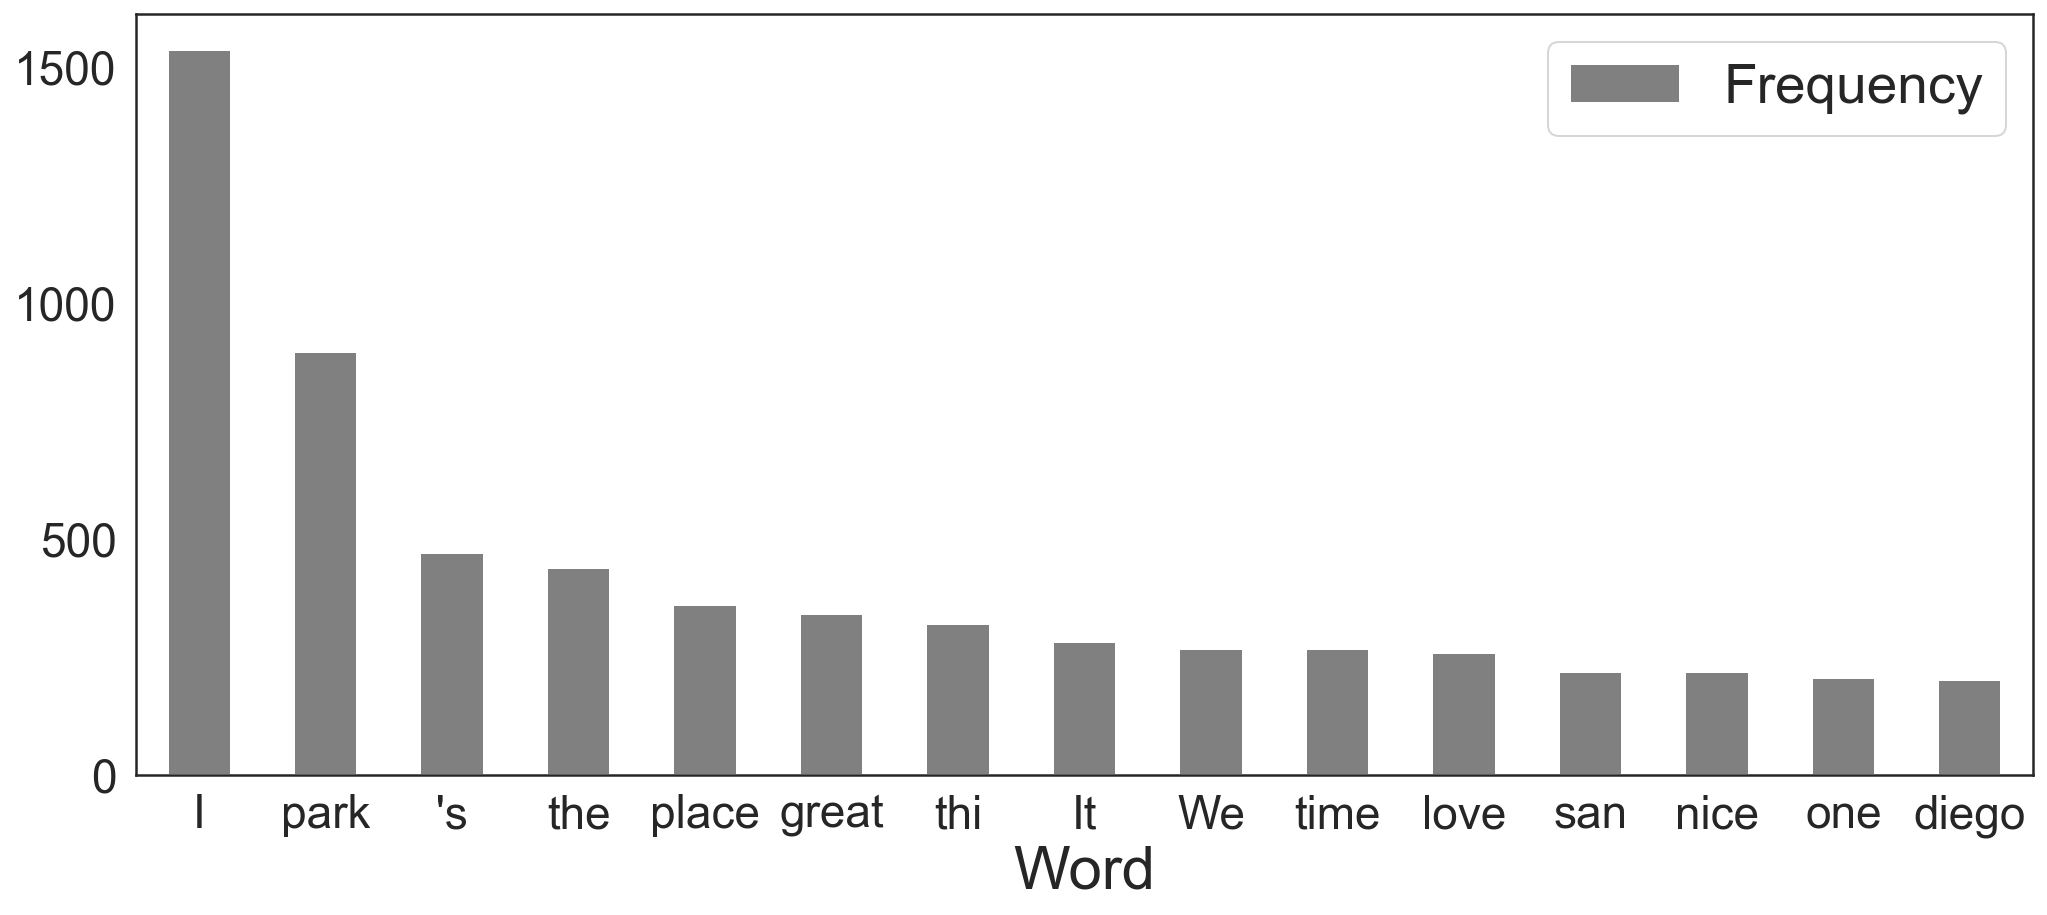

In [14]:
pos = df_pos["text"].apply(pd.Series).stack()
neg = df_neg["text"].apply(pd.Series).stack()

dist_pos = FreqDist(pos)
dist_neg = FreqDist(neg)

for punc in string.punctuation:
    del dist_pos[punc]
    del dist_neg[punc]
    
del dist_pos["..."]
del dist_neg["..."]
    
    
df_dist_pos = pd.DataFrame(dist_pos.items(), columns = ["Word", "Frequency"])

df_dist_pos = df_dist_pos.sort_values(by = "Frequency", ascending = False)
df_dist_pos[0:15].plot.bar(x = "Word", y = "Frequency", rot = 0, fontsize = 23, color = "gray")


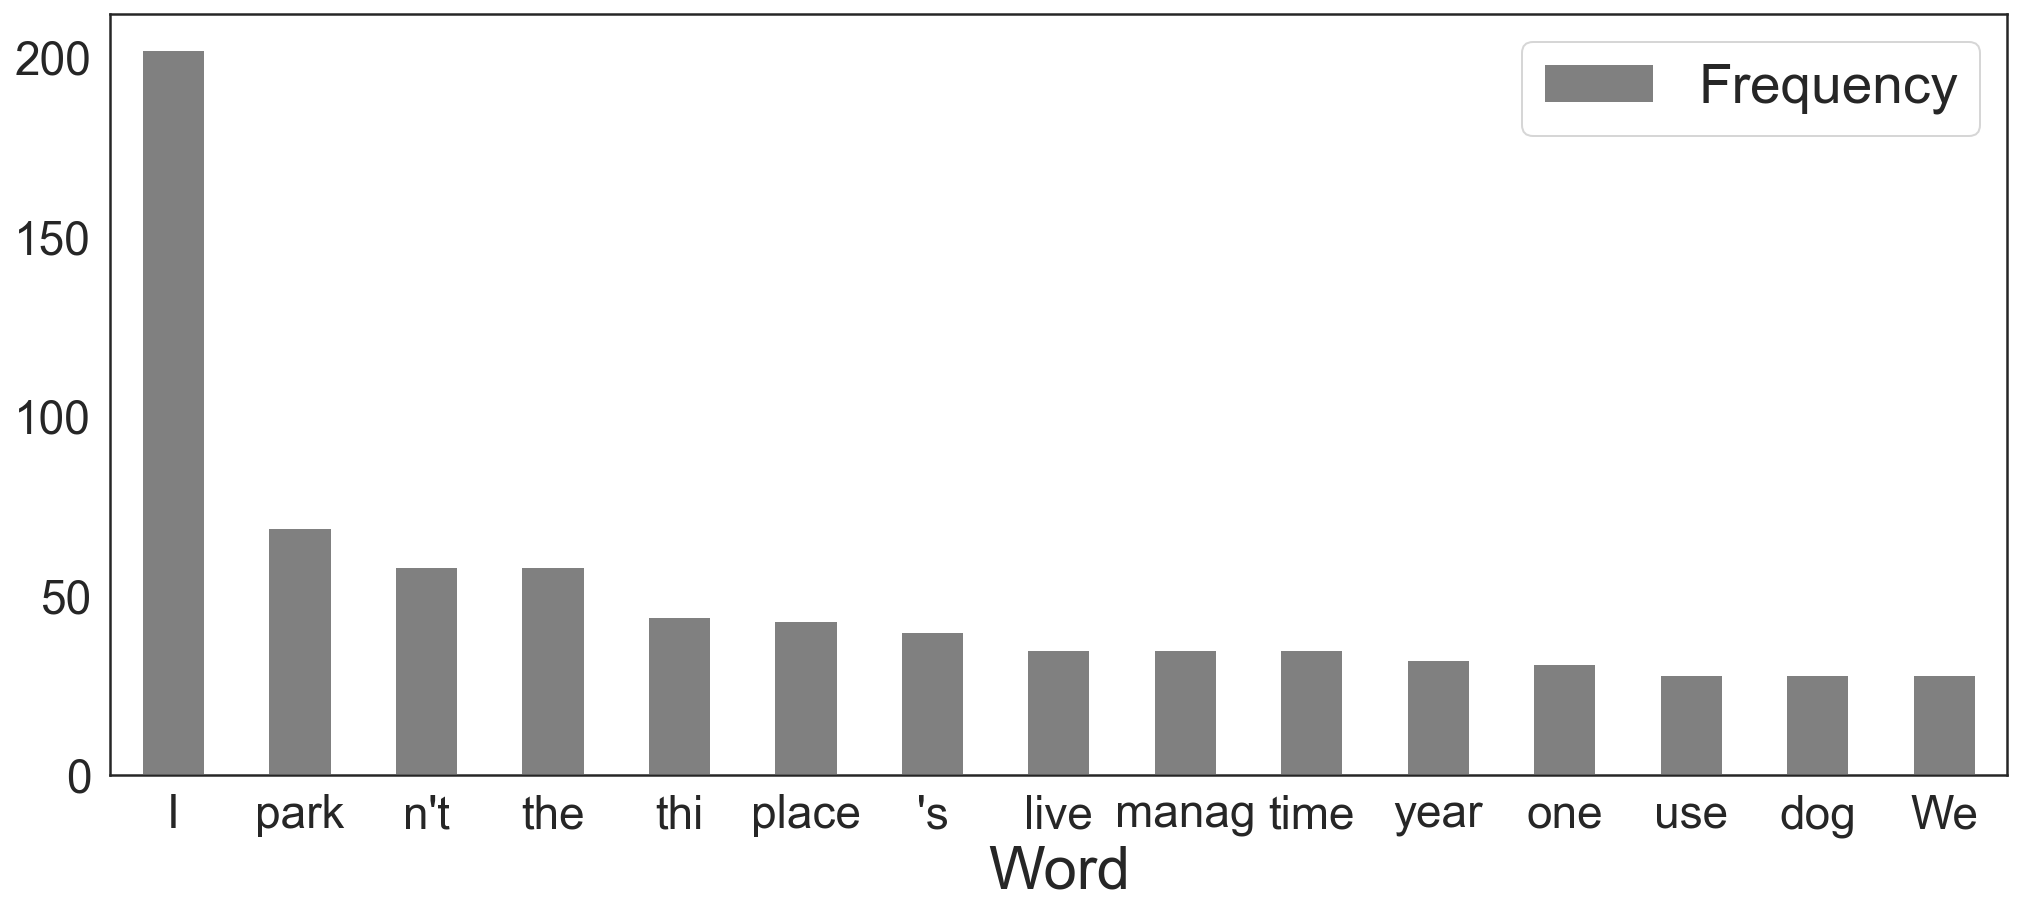

In [15]:
df_dist_neg = pd.DataFrame(dist_neg.items(), columns = ["Word", "Frequency"])
df_dist_neg = df_dist_neg.sort_values(by = "Frequency", ascending = False)
df_dist_neg[0:15].plot.bar(x = "Word", y = "Frequency", rot = 0, fontsize = 23, color = "gray")

Using FreqDist, we calculates the frequency of each word in the text and we can plot the most frequent words in both positive reviews and negative reviews.

However, these words are not very informative.

### Sentiment Analysis

In [16]:
analyser = SentimentIntensityAnalyzer()

def get_sentiments(input_list):
    
    output = pd.DataFrame()

    for sentence in input_list:
        ss = analyser.polarity_scores(sentence)
        ss['sentence'] = sentence
        output = output.append(ss, ignore_index=True)

    return output


pos_list = list(df_pos["origin_text"].values)
neg_list = list(df_neg["origin_text"].values)
pos_sentiments = get_sentiments(pos_list)
neg_sentiments = get_sentiments(neg_list)
neg_sentiments.head(10)

,compound,neg,neu,pos,sentence
0,0.8555,0.000,0.749,0.251,We love Civita Park for its wide open spaces t...
1,0.8309,0.043,0.674,0.283,Stay away!! \n\nGo take your graffiti and lou...
2,-0.4466,0.155,0.845,0.000,There is NO PARKING. This is a taxpayer mainta...
3,-0.5106,0.109,0.891,0.000,Bay Park has been a disappointment on the last...
4,-0.1027,0.076,0.862,0.062,I almost got a ticket there for having my dog ...
5,-0.3595,0.098,0.902,0.000,Stay away from the youth theater program if yo...
6,-0.0000,0.140,0.645,0.215,"I've tried, for the better part of 3, years to..."
7,-0.8225,0.272,0.728,0.000,This park brought awareness to the danger of o...
8,0.3373,0.156,0.676,0.167,Dog park review #4 - I would say 2.5 but Yelp ...
9,0.0000,0.000,1.000,0.000,We bought a home through Emerald. It was one o...


In [17]:
pos_sentiments.describe()

,compound,neg,neu,pos
count,2061.000000,2061.000000,2061.000000,2061.000000
mean,0.515656,0.022125,0.795148,0.182720
std,0.399548,0.046419,0.127815,0.127993
min,-0.895500,0.000000,0.343000,0.000000
25%,0.296000,0.000000,0.710000,0.093000
50%,0.646700,0.000000,0.801000,0.176000
75%,0.835100,0.000000,0.891000,0.265000
max,0.976300,0.302000,1.000000,0.622000


In [18]:
neg_sentiments.describe()

,compound,neg,neu,pos
count,272.000000,272.000000,272.000000,272.000000
mean,-0.043860,0.096482,0.815342,0.088180
std,0.514390,0.094989,0.114871,0.095261
min,-0.918400,0.000000,0.459000,0.000000
25%,-0.493900,0.000000,0.739500,0.000000
50%,0.000000,0.085000,0.819500,0.079000
75%,0.363375,0.157250,0.903750,0.135500
max,0.963100,0.506000,1.000000,0.541000


After calculating each response's sentiment score, we can take a look at the overall trend of positive reviews and negative reviews. We found out that the mean compound score for positive reviews is 0.52, which can be classified as a positive rating. However, the mean for negative reviews is only -0.04; while they are significantly lower than positive's score, it should be classified as a neutral level.

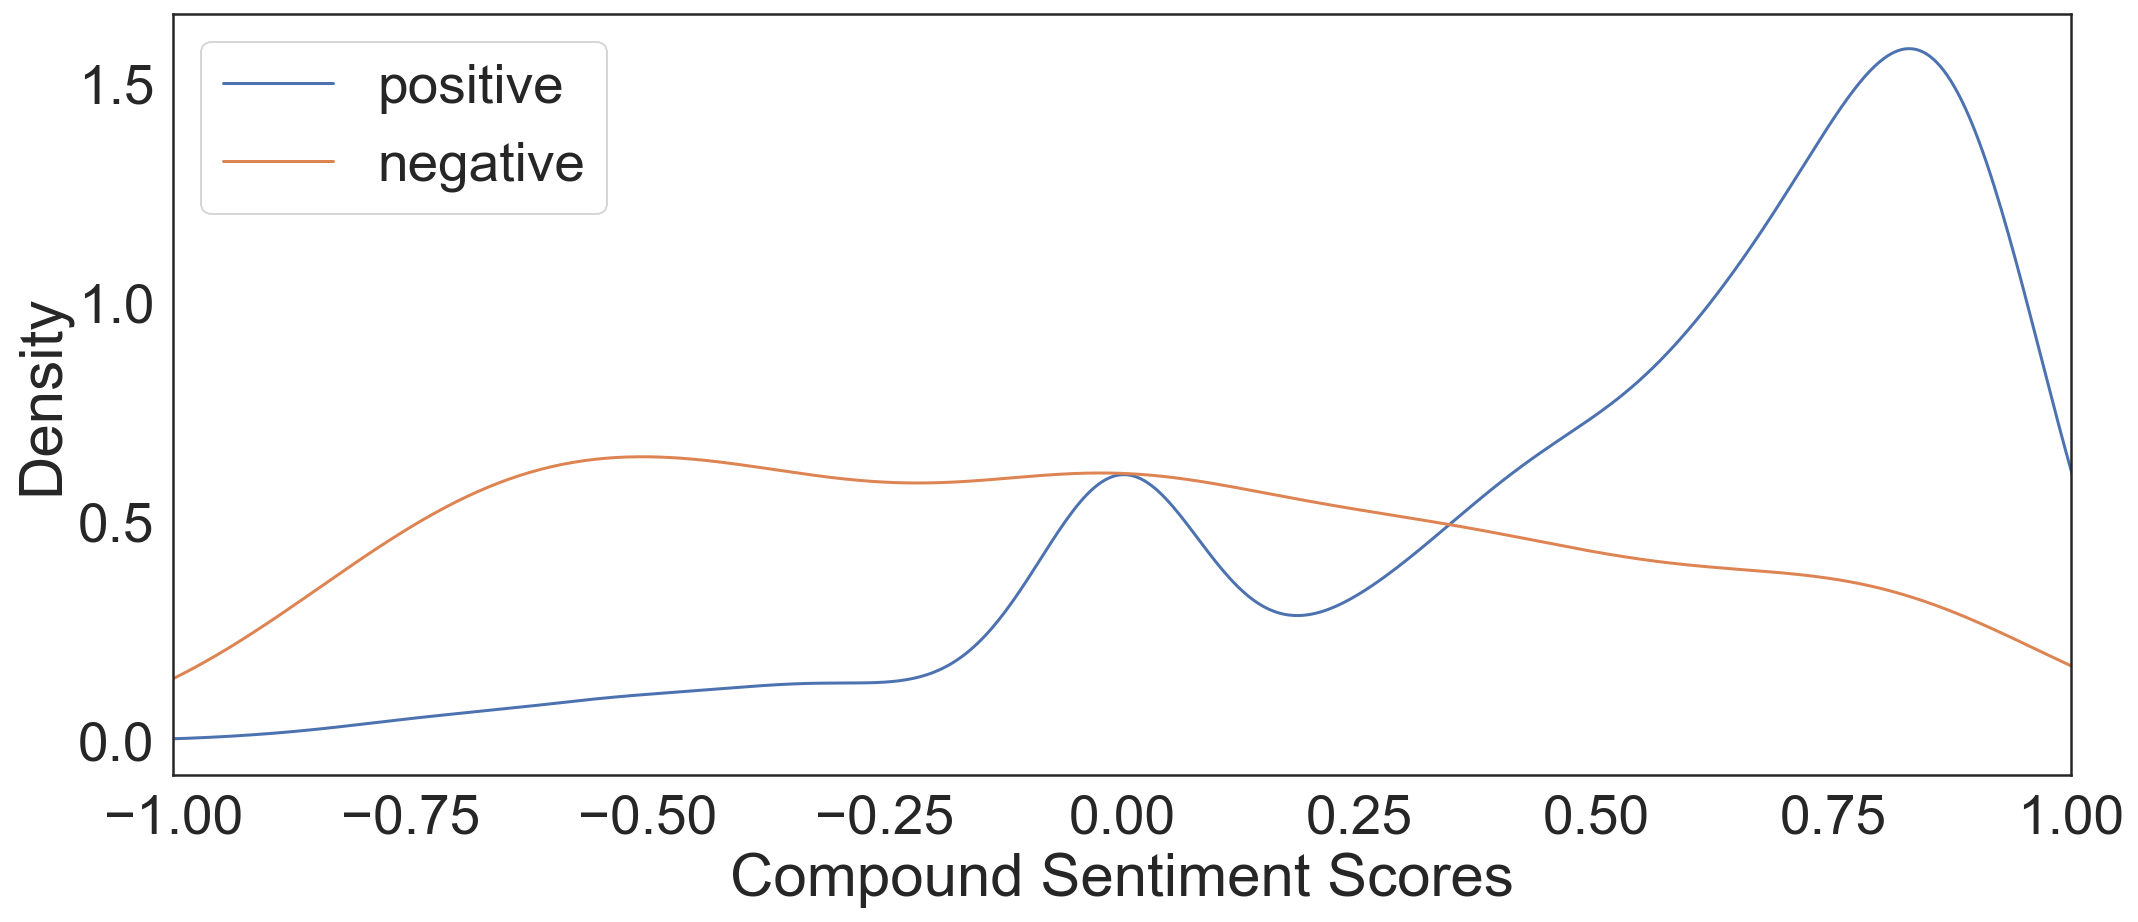

In [19]:
pos_sentiments["compound"].plot.density(label= "positive")
neg_sentiments["compound"].plot.density(label= "negative")
plt.legend()
plt.xlabel("Compound Sentiment Scores")
plt.xlim(-1,1);

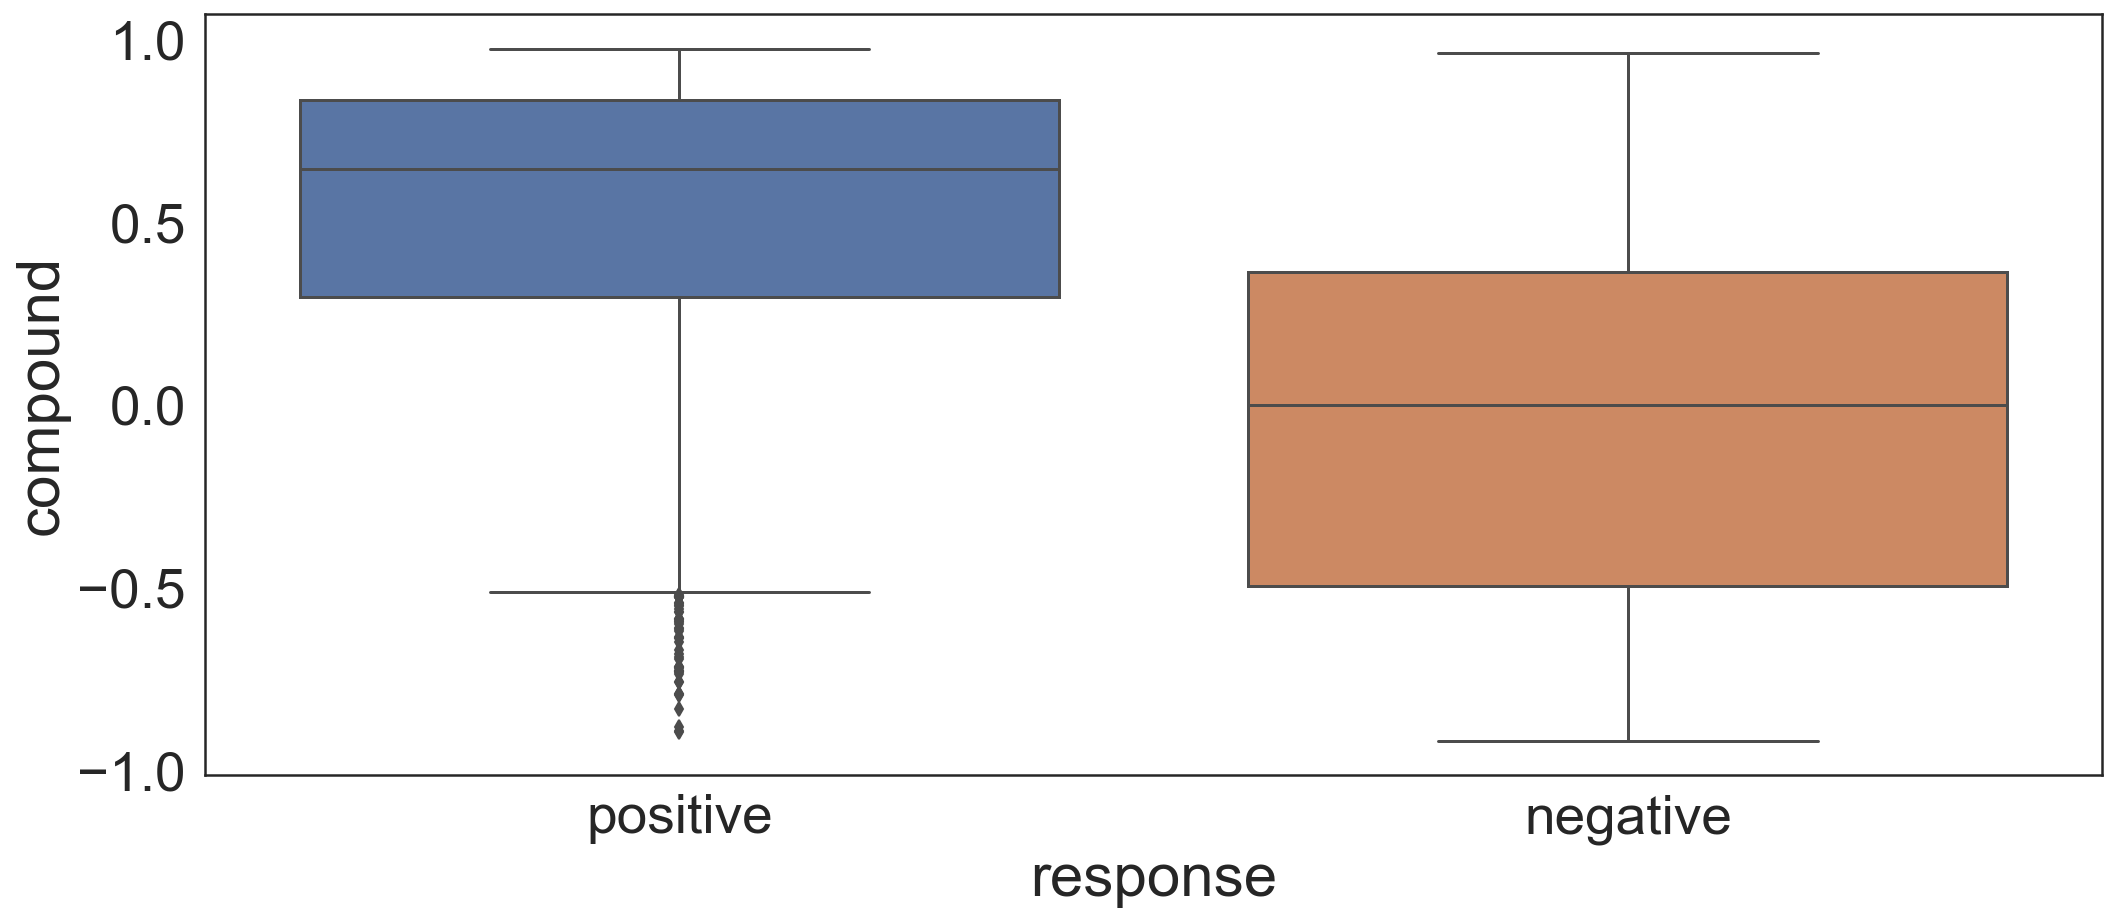

In [20]:
pos_sentiments['which'] = 'positive'
neg_sentiments['which'] = 'negative'
compound_out = pd.concat([pos_sentiments, neg_sentiments])
sns.boxplot(data=compound_out, x='which', y='compound')
plt.xlabel('response');

Take a look at these visualization, we can see the overall sentiment of 3+ stars reviews tend to be more positive that 1-2 stars reviews.

### TF-IDF

In [21]:
neg = list(map(str.lower, neg_list))
pos = list(map(str.lower, pos_list))

for c in string.punctuation:
    neg = str(neg).replace(c, "")
    pos = str(pos).replace(c, "")

corpus = [str(neg), str(pos)]

tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer='word',
                        max_features=2000,
                        tokenizer=word_tokenize,
                        stop_words=stop_words)

park_tfidf = pd.DataFrame(tfidf.fit_transform(corpus).toarray())
park_tfidf.columns = tfidf.get_feature_names()
park_tfidf = park_tfidf.rename(index = {0: "neg", 1: "pos"})
park_tfidf = park_tfidf.sort_values(by = "pos", axis = 1, ascending = False)
best_list = park_tfidf.columns.values.tolist()

In [22]:
best_list[0:120]

['park',
 'spot',
 'fun',
 'great',
 'place',
 'north',
 'favorite',
 'couple',
 'views',
 'town',
 'places',
 'cute',
 'hidden',
 'san',
 'basketball',
 'nice',
 'time',
 'visited',
 'diego',
 'one',
 'enjoyed',
 'love',
 'gem',
 'ocean',
 'baseball',
 'quick',
 'happy',
 'little',
 'team',
 'area',
 'covid19',
 'good',
 'get',
 'free',
 'parking',
 'lake',
 'dog',
 'beach',
 'beautiful',
 'well',
 'shade',
 'del',
 'hair',
 'like',
 'really',
 'ive',
 'courts',
 'years',
 'go',
 'event',
 'wedding',
 'visiting',
 'kids',
 'first',
 'best',
 'lot',
 'loves',
 'canyon',
 'people',
 'trail',
 'walk',
 'play',
 'known',
 'helped',
 'delicious',
 'around',
 'covid',
 'always',
 'amazing',
 'small',
 'day',
 'structure',
 'grassy',
 'needed',
 'green',
 'summer',
 'heart',
 'world',
 'many',
 'came',
 'come',
 'family',
 'take',
 'thing',
 'peaceful',
 'torrey',
 'process',
 'playground',
 'lots',
 'hike',
 'clean',
 'fantastic',
 'worked',
 'exercise',
 'tons',
 'road',
 'coronado',
 'im'

### Informative words in positive reviews

Things that people love about parks in San Diego:
views, basketball, ocean, baseball, free, parking, beach, dog, courts, wedding, grassy, green, kids, trail, walk, play, playground, clean, exercise, resturant.

Positive feeling about parks in San Diego:
fun, great, favorite, cute, nice, happy, beautiful, amazing, peaceful, relaxing


In [23]:
park_tfidf = park_tfidf.sort_values(by = "neg", axis = 1, ascending = False)
worst_list = park_tfidf.columns.values.tolist()
worst_list[0:150]

['park',
 'place',
 'one',
 'time',
 'years',
 'lived',
 'people',
 'dog',
 'management',
 '2',
 'dont',
 'property',
 'great',
 'government',
 'nice',
 'like',
 'first',
 'would',
 'really',
 'get',
 'ever',
 'lot',
 'service',
 'even',
 'review',
 'good',
 'moved',
 'many',
 'worst',
 'cant',
 'used',
 'san',
 'go',
 'parking',
 'homeless',
 'come',
 'see',
 'rude',
 'horrible',
 'apartments',
 'take',
 'rent',
 'potential',
 'unprofessional',
 'terrible',
 'use',
 'business',
 'apartment',
 'ago',
 'never',
 'open',
 'kids',
 'went',
 'location',
 'stay',
 'area',
 'diego',
 'months',
 'reviews',
 'company',
 'family',
 'move',
 'large',
 'us',
 'times',
 'let',
 'around',
 'staff',
 'away',
 'leave',
 'weeks',
 'cockroaches',
 'infested',
 'video',
 'blowers',
 'disgusting',
 'warning',
 'leaf',
 'companies',
 'born',
 'bad',
 'definitely',
 'nothing',
 'course',
 'decided',
 'dogs',
 'going',
 '3',
 'back',
 'since',
 'last',
 'owners',
 'tried',
 'living',
 'year',
 'took',
 'two

### Informative words in negative reviews

Things that people don't like about parks in San Diego:
dogs, management, service, parking, homeless, cockroaches, infested, blowers, leaf, trail, used

Negative feeling about parks in San Diego:
worst, rude, horrible, unprofessional, terrible, never, bad


After calculated TF-IDF, we can sort by the set of words. Take a look at the output, we can have a sense of what are the most unique and important words in both positive reviews and negative reviews.

# Ethics & Privacy

Since our project did not require any user information from the Yelp review, or any information other than the review itself, our data set did not include any personal information. This ensures that our data set is entirely anonymous. 

This project's outcome is generally for all the parks in San Diego, not for one particular park. Therefore, there is no reputational impact on any specific park.

However, there is a potential bias in our data set. When looking through our data set, I noticed that it only contains a maximum of three reviews for each park. Since we know, many of the most popular parks get many visitors and therefore leave a lot of positive reviews. Setting the upper limit to 3 has likely resulted in many valuable evaluations not being considered equally. 

# Conclusion & Discussion

After calculating TF-IDF for both positive reviews and negative reviews, I did found some more unique and important words in both categories. However, the pattern in the positive review is more significant than negative reviews and is more informative as well. Some potential reasons are:

1. In our data set, most reviews are classified as positive reviews.  Roughly, we have over 85% of reviews are 3+ stars reviews, which makes it harder to analyze negative reviews than positive reviews.

2. People tend to leave negative reviews in a pattern like "I like this and that, however..." While doing analysis, words before "however" should be classified as positive reviews, rather than mixed with negative words. That's why we saw words like "great," "nice," "good" in our negative reviews.

3. In our data set, reviews are limited to around 30 words. Like we said before, in negative reviews, people tend to list worse things in the second half of their reviews. If we cut off all reviews by 30 words, we may lose some necessary information, especially in negative reviews.

4. I also noticed that many negative reviews are about some apartment and management companies, which should not be classified as parks. People are paying high rent for their apartment. That's why they tend to have more negative feelings if the apartment didn't meet their expectation.

Back to our hypothesis. In positive reviews, I'd say we can reject the null hypothesis, in favor of the alternative, that the Yelp reviews about parks in San Diego did showed some pattern about what people love about San Diego parks. However, in negative reviews, we failed to reject the null hypothesis, which means we cannot see a significant pattern about what people hate about San Diego parks due to the limitations we discussed above.